In [1]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

In [2]:
train = kunfu.read_csv('C:\\Users\\Desktop\\t.csv').fillna(0)
print(train.head())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-

x = train[['Page']].values
print("\nTotal No. of Articles : ", (len(x)), "\n")

In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


# Language Influences Page Total View  <(0_o)>

In [4]:
# Using Counters 
# dictionary keys and their counts are stored as dictionary values
# in a sorted manner as per value

# Reason why we are taking 'en' as a root language to focus on
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]           
    
    # no_lang for media files ; wikimedia.org
    return 'no_lang'

train['language'] = train.Page.map(lang)

# Article Count 
print("\nArticle count as per Language : \n", Counter(train.language))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [5]:

language_set = {}
language_set['en'] = train[train.language=='en'].iloc[:,0:-1]
language_set['ja'] = train[train.language == 'ja'].iloc[:, 0:-1]
language_set['de'] = train[train.language == 'de'].iloc[:, 0:-1]
language_set['fr'] = train[train.language == 'fr'].iloc[:, 0:-1]
language_set['ru'] = train[train.language == 'ru'].iloc[:, 0:-1]
language_set['es'] = train[train.language == 'es'].iloc[:, 0:-1]
language_set['no_lang'] = train[train.language == 'no_lang'].iloc[:, 0:-1]

for key in language_set:
    print("KEY : ", language_set[key],"\n")

KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
8362    10_Cloverfield_Lane_en.wikipedia.org_desktop_a...         0.0   
8363    10_Gigabit_Ethernet_en.wikipedia.org_desktop_a...      1078.0   
8364    13_Hours:_The_Secret_Soldiers_of_Benghazi_en.w...         0.0   
8365             1551_en.wikipedia.org_desktop_all-agents        11.0   
8366    1896_Summer_Olympics_en.wikipedia.org_desktop_...       366.0   
8367    1918_flu_pandemic_en.wikipedia.org_desktop_all...       868.0   
8368    1923_San_Pedro_Maritime_Strike_en.wikipedia.or...         1.0   
8369    1936_Summer_Olympics_en.wikipedia.or

In [6]:
# axis =0 : vertical in NumPy ;   axis =1 : horizontal in NumPy
total_view = {} 
for key in language_set:
    total_view[key] = language_set[key].iloc[:, 1:].sum(axis=0) / language_set[key].shape[0]


for key in language_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
2015-07-06    3849.736021
2015-07-07    3643.523063
2015-07-08    3437.871080
2015-07-09    3517.459391
2015-07-10    3497.571594
2015-07-11    3517.054297
2015-07-12    3869.211216
2015-07-13    3832.417662
2015-07-14    3854.165298
2015-07-15    3563.026589
2015-07-16    3605.074747
2015-07-17    3455.528829
2015-07-18    3335.306288
2015-07-19    3540.557533
2015-07-20    3720.901319
2015-07-21    3544.275386
2015-07-22    3488.537249
2015-07-23    3435.995645
2015-07-24    3340.325991
2015-07-25    3346.974988
2015-07-26    3585.658246
2015-07-27    3643.563216
2015-07-28    3589.972955
2015-07-29    4189.383649
2015-07-30    3283.135930
                 ...     
2016-12-02    4540.718351
2016-12-03    5119.283350
2016-12-04    5171.994400
2016-12-05    5281.185830
2016-12-06    5239.822217
2016-12-07    4938.917579
2016-12

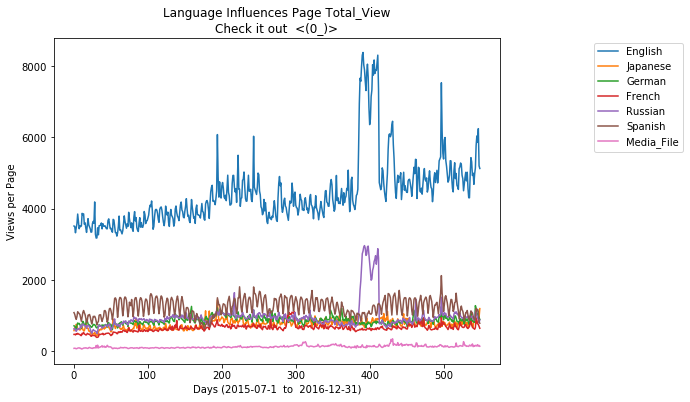

In [7]:
# Still not clear
days = [r
        for r in range(total_view['en'].shape[0])]

# height and width of graph
plot.figure(figsize=(8, 6))
labels={'ja':'Japanese','de':'German','en' : 'English','no_lang':'Media_File','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'}

for key in total_view:
    plot.plot(days,total_view[key],label = labels[key])
    

plot.ylabel('Views per Page')
plot.xlabel('Days (2015-07-1  to  2016-12-31)')
plot.title('Language Influences Page Total_View\nCheck it out  <(0_)>')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()

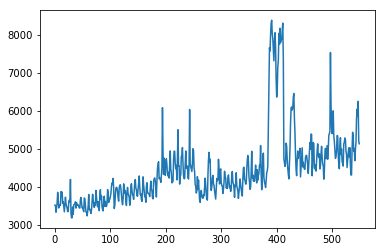

In [8]:
plot.plot(days,total_view['en'],label=labels['en'])
plot.show()

# Checking the stationarity 

1.Plotting rolling statistics
2.Dickey-Fuller test

Here the null hypothesis is that the TS is non-stationary.
The test results comprise of a Test Statistic and some Critical Values for difference confidence levels.
If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say 
that the series is stationary. 



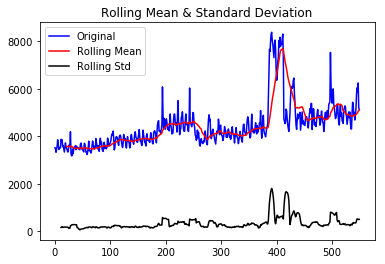

ADF Stastistic: -2.247284
p-value: 0.189534
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [9]:


from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x.values, color='blue',label='Original')
    mean = plot.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plot.plot(rolstd.values, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
test_stationarity(total_view['en'])


# Making the time series stationery

## Estimitating and eliminating trend and seasonality


## 1.Log transformation

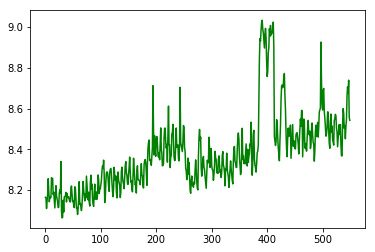

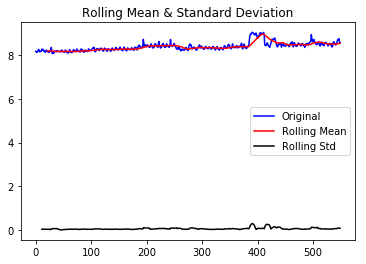

ADF Stastistic: -2.032439
p-value: 0.272533
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [10]:

ts_log = dragon.log(total_view['en'])
plot.plot(ts_log.values,color="green")
plot.show()

test_stationarity(ts_log)

# Remove trend and seasonality with decomposition

C:\Users\NISHANT\Anaconda3\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


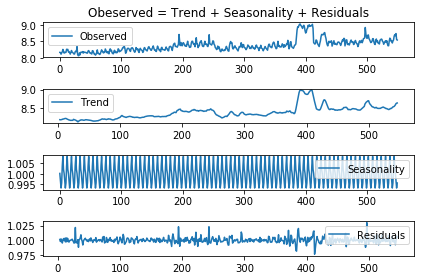

In [11]:
# Naive decomposition of our Time Series as explained above
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plot.subplot(411)
plot.title('Obeserved = Trend + Seasonality + Residuals')
plot.plot(ts_log.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()

In [12]:
ts_log_decompose = residual
#ts_log_decompose.fillna(inplace=True)
#test_stationarity(ts_log_decompose)

# Remove trend and seasonality with differencing


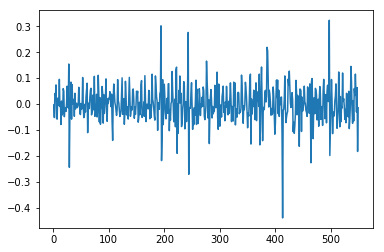

In [13]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff.values)
plot.show()

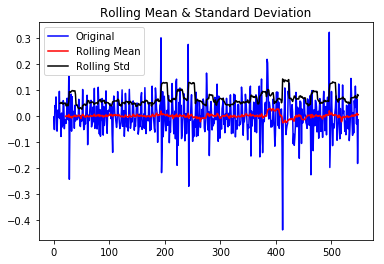

ADF Stastistic: -8.154260
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [14]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


The ADF statistic is much lesser than critical value at 1%. So there is 99% confidence interval that our graph is now stationery.
Now we can apply the ARIMA model

# Plot the autocorreltaion and partial auto correlation functions

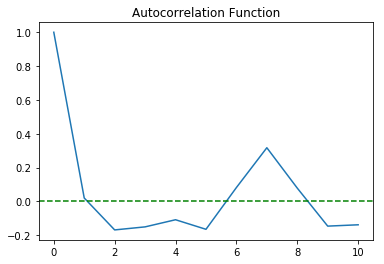

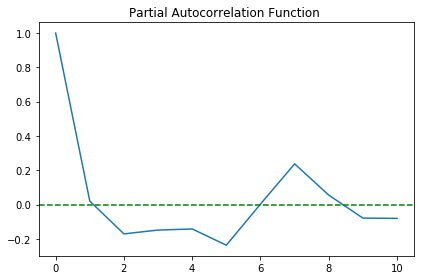

In [15]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plot.subplot(1,1,1)

plot.plot(lag_acf)
#print(lag_acf[0.5])

plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(lag_pacf)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.show()


# Auto Regressive (AR) Model

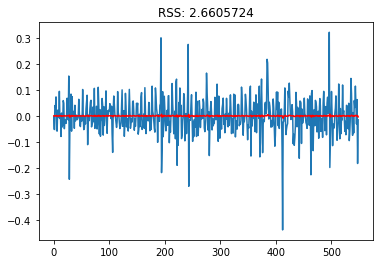

In [16]:
# follow lag
model = ARIMA(ts_log.values, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()

# Moving Average (MA) Model

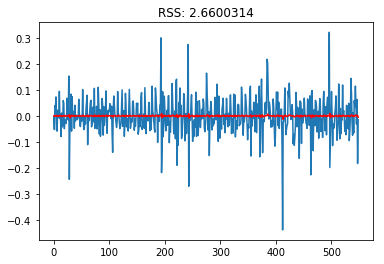

In [17]:
# follow error
model = ARIMA(ts_log.values, order=(0,1,1))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()

# ARIMA MODEL

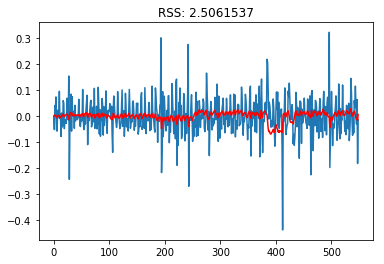

In [18]:
model = ARIMA(ts_log.values, order=(1,1,1))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff.values)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plot.show()

In [19]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  549
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 699.951
Method:                       css-mle   S.D. of innovations              0.067
Date:                Thu, 16 Nov 2017   AIC                          -1391.902
Time:                        18:51:33   BIC                          -1374.670
Sample:                             1   HQIC                         -1385.167
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0008      0.000      5.830      0.000         0.001     0.001
ar.L1.D.y      0.8753      0.021     41.812      0.000         0.834     0.916
ma.L1.D.y     -1.0000      0.005   -182.566      0.0

In [20]:
size = int(len(ts_log)-100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=0)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
    #error = mean_squared_error(dragon.exp(yhat), dragon.exp(obs))
    #print('mean_squared_error : ', error)
print('\n Means Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')


Printing Predicted vs Expected Values...


predicted = 4598.531984,   expected = 4461.695661,   error = 3.066913  %
predicted = 4545.847079,   expected = 4456.174589,   error = 2.012320  %
predicted = 4540.171993,   expected = 4775.697611,   error = 4.931753  %
predicted = 4830.782628,   expected = 4818.150572,   error = 0.262176  %
predicted = 4869.845933,   expected = 4824.929940,   error = 0.930915  %
predicted = 4876.101143,   expected = 4704.449021,   error = 3.648719  %
predicted = 4766.951867,   expected = 4559.138958,   error = 4.558161  %
predicted = 4634.348797,   expected = 4347.536502,   error = 6.597122  %
predicted = 4439.972419,   expected = 4645.420275,   error = 4.422589  %
predicted = 4711.544906,   expected = 4904.789282,   error = 3.939912  %
predicted = 4947.160761,   expected = 5161.465903,   error = 4.152021  %
predicted = 5178.931930,   expected = 4982.463373,   error = 3.943201  %
predicted = 5018.832630,   expected = 5385.581882,   error = 6.809835  %
predicte

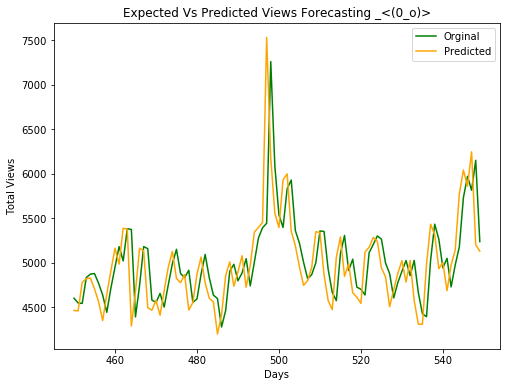

In [21]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

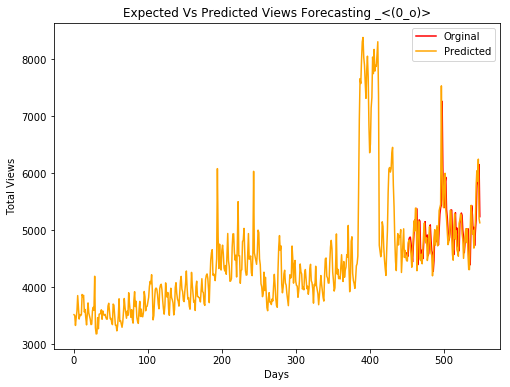

In [22]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'red')
plot.plot(days, total_view['en'], color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

In [23]:
npages = 5
top_pages = {}
key = 'en'
print(key)
sum_set = kunfu.DataFrame(language_set[key][['Page']])
sum_set['total'] = language_set[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(5))
top_pages[key] = sum_set.index[0]
print('\n')

en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09




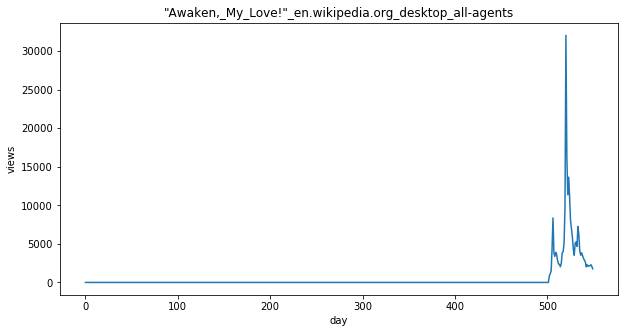

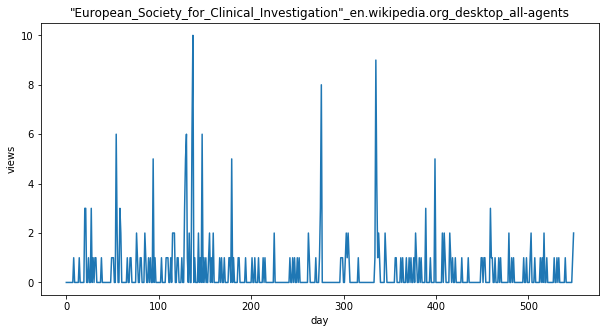

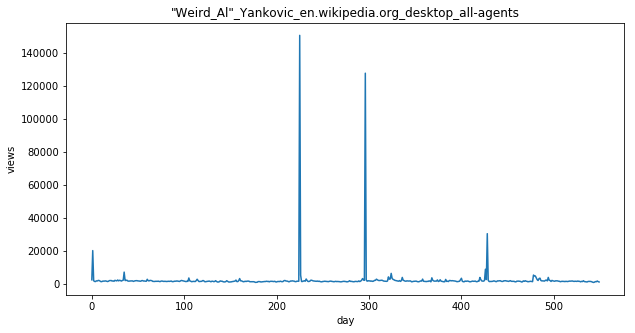

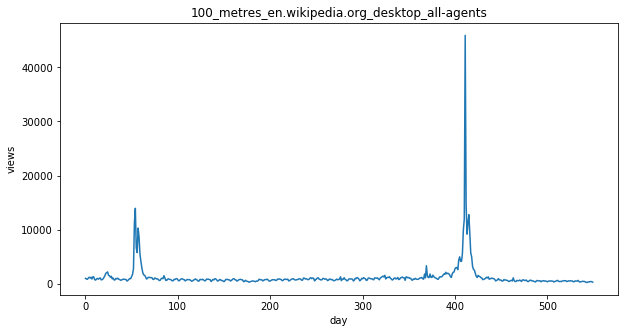

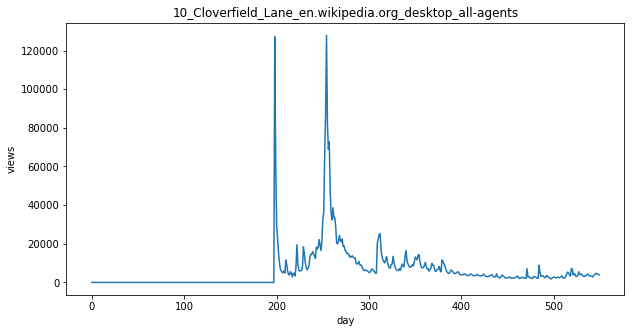

In [24]:
def plot_entry(key,idx):
    data = language_set[key].iloc[idx,1:]
    fig = plot.figure(1,figsize=(10,5))
    plot.plot(days,data)
    plot.xlabel('day')
    plot.ylabel('views')
    plot.title(train.iloc[language_set[key].index[idx],0])
    
    plot.show()
    
idx = [1, 2, 3, 4, 5]
for i in idx:
    plot_entry('en',i)

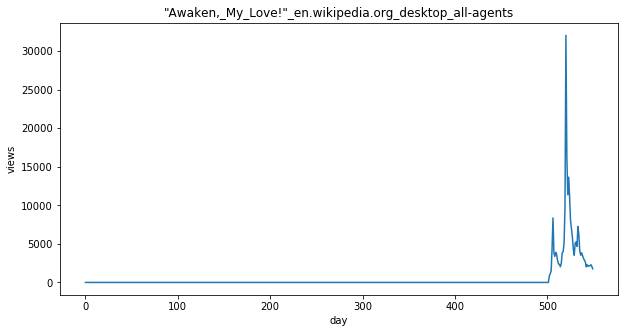

"Awaken,_My_Love!"_en.wikipedia.org_desktop_all-agents
2016-12-27    2175
2016-12-28    2156
2016-12-29    2302
2016-12-30    2098
2016-12-31    1770
Name: 8358, dtype: object


In [25]:

data = language_set['en'].iloc[1,1:]
fig = plot.figure(1,figsize=(10,5))
plot.plot(days,data)
plot.xlabel('day')
plot.ylabel('views')
plot.title(train.iloc[language_set['en'].index[1],0])
plot.show()

print(train.iloc[language_set['en'].index[1],0])
print(data.tail())